In [1]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output

Using TensorFlow backend.


In [2]:
data = pd.read_csv('feature/feature_tt1.csv')

In [3]:
data.head()

,MeanDelta,MedianDelta,SkewnessDelta,KurtosisDelta,StdDeviaDelta,RMSDelta,EnergyDelta,MeanTheta,MedianTheta,SkewnessTheta,...,RMSgammaLow,EnergygammaLow,MeangammaMid,MediangammaMid,SkewnessgammaMid,KurtosisgammaMid,StdDeviagammaMid,RMSgammaMid,EnergygammaMid,Level
0,8.678004e+05,471980.0,6.900105,50.809972,2180252.207,2329379.638,1,2705772.220,126485.0,1.977388,...,2181226.244,1,289491.1356,4153.0,7.681071,58.999222,2179685.673,2180437.760,1,1
1,1.850794e+06,955759.0,3.881542,14.407807,3566533.667,3991240.860,1,3004172.983,167201.0,1.803309,...,3782084.274,1,577820.3051,3042.0,5.285282,26.848516,3060695.372,3089167.403,1,1
2,1.134943e+06,479148.0,5.016887,24.924251,2999883.170,3183530.068,1,2990260.712,163977.0,1.801485,...,6169502.272,1,291403.8136,5399.0,7.681019,58.998682,2180037.296,2181038.030,1,1
3,1.170896e+06,481808.0,5.024274,24.982093,2993933.569,3191035.985,1,2100540.559,81245.0,2.416789,...,6898355.875,1,292725.5085,6579.0,7.680904,58.997476,2179888.992,2181069.300,1,1
4,9.273475e+05,426105.0,6.595898,47.577368,2206970.446,2376581.045,1,3835929.017,133225.0,1.380041,...,3779434.127,1,293125.3898,6583.0,7.680887,58.997303,2181088.932,2182301.945,1,1


In [4]:
X = data.loc["MeanDelta":"EnergygammaMid",:]
y = data.Level

In [5]:
data.shape

(161, 57)

In [6]:
pca = PCA(0.95)
X_pca = pca.fit_transform(data)

In [7]:
pca.components_.shape

(7, 57)

In [8]:
pca.explained_variance_ratio_

array([0.5164807 , 0.14535058, 0.09011288, 0.07105651, 0.05264066,
       0.04033724, 0.0368502 ])

In [10]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000])

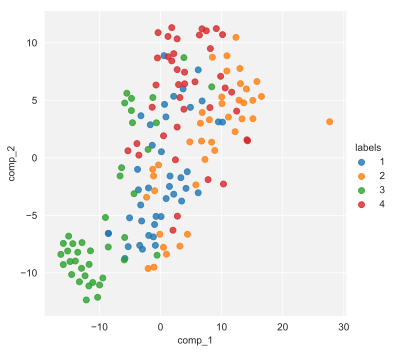

In [17]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(161) ,fit_reg=False)


In [18]:
#First going to process the data into image matricies
data = pd.read_csv('Feature/feature_tt1.csv')
X_train = data.loc["MeanDelta":"EnergygammaMid",:]
y_train = data.Level
Xp = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 161 samples in 0.000s...
[t-SNE] Computed neighbors for 161 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 161 / 161
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.000000
[t-SNE] KL divergence after 650 iterations: 0.000000
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 161 samples in 0.000s...
[t-SNE] Computed neighbors for 161 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 161 / 161
[t-SNE] Mean sigma: 1.773316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.811172
[t-SNE] KL divergence after 1000 iterations: 0.720048
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 161 samples in 0.000s...
[t-SNE] Computed neighbors for 161 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 161 / 161
[t-SNE] Mean sigma: 2.772116
[t-SNE] KL divergence after 250 iterations 

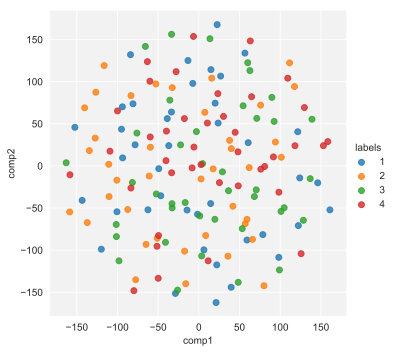

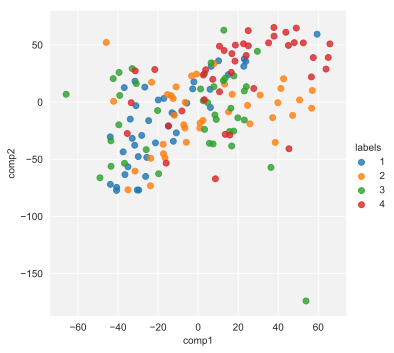

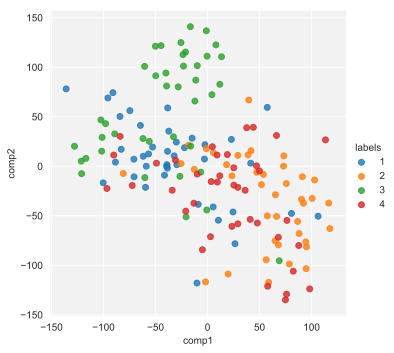

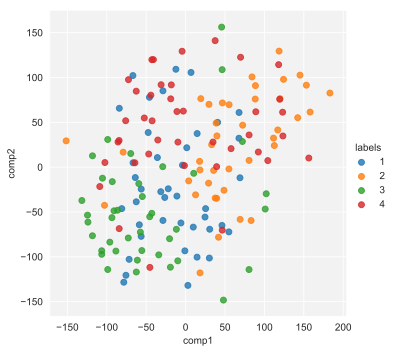

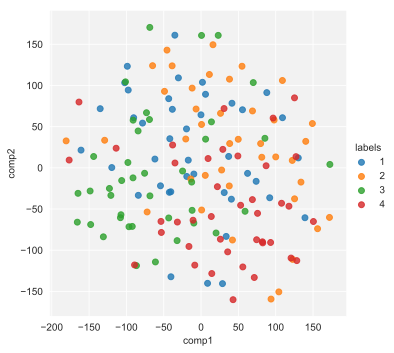

In [22]:
n_sne = 161
for i in range(5):
    tsne = TSNE(n_components=3,verbose=1,perplexity=10*i,n_iter=1000)
    X_tsne = tsne.fit_transform(Xp[:n_sne])
    Xf = pd.DataFrame(X_tsne)
    Xf.columns = ["comp1","comp2","comp3"]
    Xf['labels'] = y_train[:n_sne]
    sns.lmplot("comp1","comp2",hue="labels",data=Xf,fit_reg=False)

In [26]:
n_tsne=161
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000)
Xt = tsne.fit_transform(Xp[:n_tsne])
print(Xt.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 161 samples in 0.000s...
[t-SNE] Computed neighbors for 161 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 161 / 161
[t-SNE] Mean sigma: 341.025705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.676682
[t-SNE] KL divergence after 750 iterations: 0.176386
(161, 2)


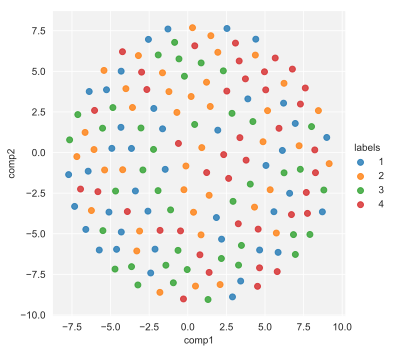

In [27]:
Xdf = pd.DataFrame(Xt)
Xdf.columns = ['comp1','comp2']
Xdf['labels'] = y_train[:n_tsne]
sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)